In [2]:
from skimage import io, exposure, measure, util, filters
import pandas as pd
import numpy as np 
import os 
import glob 
import matplotlib.pyplot as plt
import re
import cv2
from pathlib import Path
from scipy.spatial.distance import cdist

In [241]:
os.getcwd()

'/hpc/scratch/hdd2/fs541623/Cell_Tox_Assay_080421/FEATURE_EXTRACTION'

In [3]:
## metadata to extract filenames; to create new ones 
re_time = re.compile(r'(Time_\d+hrs_R\d)')
re_well = re.compile(r'(Well_\d+)')
re_field=re.compile(r'(Field_\d+)')

In [3]:
## Input/Output Files 
output_dir = Path('/hpc/scratch/hdd2/fs541623/CellProfilerFeatureExtraction/CP_Cropped_Cells')
input_masks = sorted(glob.glob('/hpc/scratch/hdd2/fs541623/Pre_processed_Images/*/*/Cyt/*cp_masks*'), key=os.path.getctime)
input_BF_dir = Path('/hpc/scratch/hdd2/fs541623/Pre_processed_Images')

###### input_masks[40]

In [239]:
def get_blurred_mask(BF_file, mask_img, centre_x, centre_y): 
    
    BF_img = io.imread(BF_file).astype('float')/255
    mask_img = mask_img.astype('float')/255

    print('------------get centre crop--------------------')
    mask_blurred  = filters.gaussian(mask_img,1)
    mask_large=np.where(mask_blurred>0, BF_img, 1)
    mask_large_blurred = filters.gaussian(mask_large, 3)
    img=mask_large_blurred.astype('float')/255
    img=((img*BF_img)*255).astype('uint16')
    return (crop_img_test(img, centre_x, centre_y ))

In [240]:
for file in input_masks:
    
    ## Get Pixel Identity Map
    mask_img = io.imread(file)
    px_list = list(np.unique(mask_img)); pxs = px_list.remove(0)
    
    ## Get BF path using metadata from filename of mask
    time, well, field = get_metadata(file, re_time, re_well, re_field)
    BF_path = input_BF_dir/time/well/'Brightfield'/f'{time}_{well}_{field}_C1.tif'
    
    get_cropped_obj(mask_img, px_list, BF_path, output_dir, time, well, field)

------------get centre crop--------------------
saving image
------------get centre crop--------------------
saving image
------------get centre crop--------------------
saving image
------------get centre crop--------------------
saving image
------------get centre crop--------------------
saving image
------------get centre crop--------------------
saving image
------------get centre crop--------------------
saving image
------------get centre crop--------------------
saving image
------------get centre crop--------------------
saving image
------------get centre crop--------------------
saving image
------------get centre crop--------------------
saving image
------------get centre crop--------------------
saving image
------------get centre crop--------------------
saving image
------------get centre crop--------------------
saving image
------------get centre crop--------------------


KeyboardInterrupt: 

In [215]:
## For filenames 
def get_metadata(mask_file, re_time, re_well, re_field):
    time = re_time.findall(str(mask_file))[0]; well = re_well.findall(str(mask_file))[0]
    field=re_field.findall(str(Path(mask_file).name))[0]
    return (time, well, field)

In [235]:
## Get Cropped Objects 
def get_cropped_obj(mask_img, px_list, BF_path, output_dir, time, well, field): 
    
    ## Set obj number to match csv from cellprofiler 
    Obj_number = 0
    for pixel in px_list:
        mask_bin = np.where(mask_img == pixel, 1, 0)

        ## get centre coordinates
        y,x = [(region.centroid[0], region.centroid[1]) for region in measure.regionprops(mask_bin)][0]

        if (y < 100) or (y > mask_bin.shape[0]-100) or (x < 100) or (x > mask_bin.shape[1]-100):
            continue

        ## Crop BF_img using centre coordinates
        img = get_blurred_mask(BF_path, mask_bin, x, y)
        Obj_number += 1

        ## Save cropped cell 
        output = output_dir/time/well/field
        file = f'{time}_{well}_{field}_CytObj{Obj_number}.tif'
        save_crop(img, output, file)
    return 0

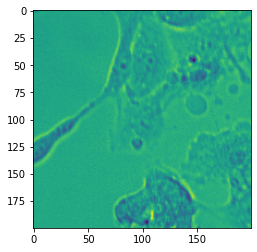

In [184]:
plt.imshow(img)

In [ ]:
data['Px_value'] = px_list

In [37]:
## Pick first 5 masks
test_5_masks = data_f.iloc[:10]

In [38]:
## mask on each object
test_5_masks

,centroid-0,centroid-1,Filename
50,107.358304,963.188153,51
51,112.957895,519.844737,52
52,121.792399,779.994299,53
53,114.075000,2093.125000,54
54,126.763382,1447.155109,55
55,132.217666,871.121977,56
56,135.270718,560.187845,57
57,136.299186,1127.909769,58
58,141.310150,805.590226,59
59,141.055100,2245.963115,60


In [39]:
data_f = data_f.rename(columns={'centroid-0': 'Location_Center_Y', 'centroid-1': 'Location_Center_X'})

In [232]:
## save function
def save_crop(img, output_dir, file):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    io.imsave(output_dir/file, img)
    print('saving image')
    
    return 0

In [190]:
## Crop out objects based on center coordinates 
def crop_img_test(img,centre_X, centre_Y):

    # Crop using centre
    y2, y1, x2, x1 = int(centre_Y+100), int(centre_Y-100),  int(centre_X+100), int(centre_X-100)
    cropped = img[y1:y2, x1:x2]
    
    return cropped

In [ ]:
## For each mask crop corresponding BF_image

In [ ]:
def main()
